# Final Assignment

# Due date: 27/03/2016

## Introduction

We worked on several aspects of numerical reservoir engineering in separate assignments over the last couple of weeks - and here, we will now finally put things together and solve a combined fluid flow and transport problem!

The problem is conceptually still quite simple and you should be able to re-use a lot of the code you previously generated for the other assignments. 

### Assignment overview

**Note**: The main difference to previous assignments is that **you have to work on this assignment on your own** - not any more in a small group as before. When finished, please submit the finished notebook to:

<wellmann@aices.rwth-aachen.de>

Whenever possible, use the provided function definitions and return values that are given below. You are free to write more/ additional functions, but the provided functions are the ones that will be used for grading.

### Points

This assingment counts **50% to the final mark** of the exercise class.


In [1]:
#from IPython.core.display import HTML
#css_file = 'nre2_style.css'
#HTML(open(css_file, "r").read())

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
from __future__ import division

In [5]:
plt.rcParams['figure.figsize'] = [8, 6.]
plt.rcParams['font.size'] = 12

## Problem description

### Scenario

We are investigating here a problem of fluid flow and contaminant transport. Imagine the following scenario:

**Scenario 1**: A driver in a car along a beautiful lakeside in your favorite imaginative country takes a picture of the lake *while driving* because he (she) wants to share it with all his (her) friends on facebook. Distracted from driving, the car unfortunately drives into a ditch next to the road. Nothing really happens, but the phone is broken (oh no!) and the petrol tank damaged - and fuel leaks into the ground! This is a major problem (not the phone!) as we are in the middle of a drinking water catchment and a drinking water source is close by. You, as an expert modeller, are asked to investigate if there is a risk that the leaked fuel contaminates the source. As you are new to this type of study, you really want to get a good result, so you decide to write all the code yourself to make sure you understand how reliable your analysis is.

-----

Alternatively, consider **scenario 2**: imagine you live in King's Landing on Westeros (If you don't know what Westeros is, then don't worry and go back to scenario 1). An exhausted pyromaster accidentally spilled <a href = "http://awoiaf.westeros.org/index.php/Wildfire">Wildfire</a> during production and it leaked into the ground. The King asks you for the favor to investigate if there is a risk that the wildfire could reach his personal favorite hot water pool where he likes to enjoy moments at candlelight. As you know what happens to people who do not fulfill the King's favors, you happily agree to do so - and *really, really* don't want to mess it up...

-----


Luckily, the hydrogeological setting that we have to investigate seems to be quite simple:

1. The main flow field is down-slope from the hight of the source to the water table of the lake, without significant lateral flow: we can treat it as a 1-D case.
2. The water level at the source location and at the lake is known and we can treat these two points as Dirichlet boundary conditions.
3. We are primarily interested in the transport of the contaminant and can neglect fluctuations of the groundwater, so we treat the problem as steady-state.
4. However, we have to consider the effect of rainfall in the area as a significant factor.

### Simulation Set-up and parameters

The width of the simulated domain (between water source/ hot pool and lake/ blackwater rush) is 150 m. You quickly perform measurements of rock properties and obtain the following values:

| Property | Variable name | value | unit | 
|----------|-------|------|-------------|
| Transmissivity | T | 0.01 | [m^2/s] |
| Hydraulic conductivity | K | 0.001 | [m/s] |
| Porosity | por | 0.2 | [] |

You decide to set-up the 1-D model domain for the simulation with the following settings:

| Property | Variable name | value | unit | 
|----------|-------|------|-------------|
| Domain width | L | 150 | [m] |
| Number of cells | nx | 300 | [m] |

The lake/ blackwater is situated at $x = 0$ m, and the source/ pool at $x = 150m$. 
The spill occurred at a distance of $x = 90$ m. 

Measurements of boundary conditions and source terms (rainfall!) reveal:

| Property | Variable name | value | unit | 
|----------|-------|------|-------------|
| Hydraulic head of lake | bc_0 | 10 | [m] |
| Hydraulic head of water source | bc_1 | 12 | [m] |
| Specific recharge per meter (rainfall) | q | 2E-4 | [m/s] |

Note that recharge $q$ as a flux has units of velocity (think of it as volume of water infiltrating through an area of the land surface). 

With these parameters, we will now set up the model.


## 1-D Simulation of fluid flow and contaminant transport (10 pts)

The first step in the analysis is now to perform a simulation to determine the position of the hydraulic head in the subsurface. With the simplifications given above, the groundwater flow equation becomes:

$${T} \, \frac{\partial^2 h}{\partial x^2} - q = 0$$ 

**Your task**: Determine the steady-state position of the hydraulic head $h(x)$ in the investigated domain and create a plot of the results:

In [6]:
########################## Global Variables ############################################
#Physical Property 
T = 0.01        #Transmissivity [m^2/s]
K = 0.001       #Hydraulic conductivity [m/s]
por = 0.2       #porosity [-]

#Domain Geometry
L = 150         #Domain width [m]
nx = 400        #Number of cells
dx = L/nx       #Step size[m]
xvals = np.linspace(0,L,nx)
spill_loc = 90

#Fluid-related property
bc_0 = 10       #Hydraulic head of the lake (Dirichlet BC) [m]
bc_1 = 12       #Hydraulic head of the water source (Dirichlet BC) [m]
qsource = 1e-5  #Specific recharge per meter of profile length (rainfall) [m/s] 

########################################################################################

In [7]:
########################################################################
####### Solving for hydraulic head numerically #########################
########################################################################

def hydraulic_head(bc_0,bc_1,qsource,spill_loc,T,dx,nx,plot=True):
    
    # Solve for hydraulic head using the system 
    # Au=b with a diagonal matrix
  
    # Construct a diagonal matrix 
    A = np.zeros(shape=(nx,nx))
    i,j = np.indices(A.shape)
    A[i==j] = -2
    A[i==j-1] = 1
    A[i==j+1] = 1
  
    # Dirichlet boundary conditions
    b   = np.ones(nx) * (-qsource/T) * dx**2 * 0.5
    b[0 ] = -bc_0
    b[-1] = -bc_1
    
    # Solve the linear system for hydraulic head 
    h = np.linalg.solve( A, b )
    print "The maximum hydraulic head is %.3f m" % max(h)
    
    # Plot a figure when called for
    if plot==True:
        plt.figure(figsize=(15,5))
        plt.plot(xvals,h,linewidth=2)
        plt.axvline(x=spill_loc, ymin=0, ymax=1,linewidth=1, color='r')
        plt.title('Steady-state Subsurface Hydraulic Head' )
        plt.xlabel("Distance [m]") 
        plt.ylabel("Hydraulic Head [m]")
        plt.grid()
        plt.legend(['Hydraulic Head profile','Location of fuel spillage'],loc="best")
        
    return h

The maximum hydraulic head is 12.590 m


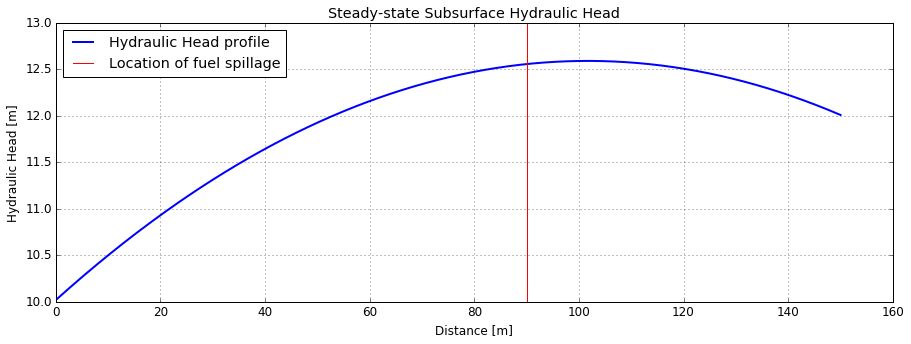

In [8]:
h = hydraulic_head(bc_0,bc_1,qsource,spill_loc,T,dx,nx,plot=True)

## Determine velocities (10 pts)

Determine now velocities from the determined head distribution and hydraulic conductivities. We discussed this step during the lecture. Perform the following steps for the analysis:

$$w_{1-\frac{1}{2}} = -K \frac{h_{i} - h_{i-1}}{\Delta x}$$
$$w_{1+\frac{1}{2}} = -K \frac{h_{i+1} - h_i}{\Delta x}$$

An obvious question when considering this equation is how to determine the value at the boundaries (w[0], w[-1]), as the calculation would require a value outside of the domain. There are several possibilities to deal with this problem. We will here simple perform a linear extrapolation from the inside nodes:

```w[0] = 2 * w[1] - w[2]
w[-1] = 2 * w[-2] - w[-3]```

And we then take arithmetic average at the node point as representative velocity value:

$$w_i = \frac{w_{1-\frac{1}{2}} + w_{1+\frac{1}{2}}}{2}$$

Note that we determine the Darcy flux (also called specific discharge, or seepage velocity) with this equation, and *not* the fluid velocity $v$! However, as we learned in the lecture, the relationship between the two velocities is rather simple:

$$v = \frac{w}{\phi}$$

Where $\phi$ is the aquifer porosity.

**Your task**: Write a function to determine specific discharge and fluid velocity:


In [9]:
########################################################################
####### Solving for fluid velocity numerically #########################
########################################################################

def fluid_velocity(h,nx,dx,K,por,plot=True,info=True):
    
    # Initilise an empty array to contain Darcy Flux
    w = np.zeros(nx)
    
    #########################################
    # Determine Darcy's Flux (Specific Discharge)
    for i in range(1,nx-1):  
        w_minus = -K * ((h[i] - h[i-1])/dx) 
        w_plus = -K * ((h[i+1] - h[i])/dx) 
        w[i] = (w_plus + w_minus) / 2
    
    #########################################
    # Linear extrapolation at the boundaries    
    w[0] = 2 * w[1] - w[2]
    w[-1] = 2 * w[-2] - w[-3]
    
    #########################################
    # Determine fluid velocity    
    v = w/por
    
    if info == True:
        print "Local mininum fluid velocity (approx.): %.5f m/s" %min(v) 
        print "Local maximum fluid velocity (approx.): %.5f m/s" %max(v)
    

    # Plot a figure when called for
    if plot == True:
        plt.figure(figsize=(15,5))
        plt.plot(xvals,v,linewidth=2)
        plt.axhline(y=0, xmin=0, xmax=1,linewidth=1, color='k')
        plt.title('Fluid velocity profile')
        plt.xlabel("Distance [m]")
        plt.ylabel("Fluid Velocity [m/s]")
        plt.grid()
        
        
    return v

Local mininum fluid velocity (approx.): -0.00025 m/s
Local maximum fluid velocity (approx.): 0.00012 m/s


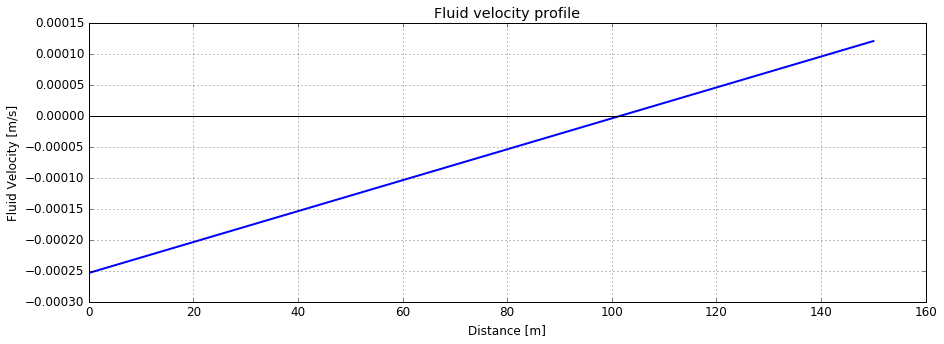

In [10]:
v = fluid_velocity(h,nx,dx,K,por, plot=True,info=True)

## Simulate contaminant transport (10 pts)

You now have the velocity distribution and should be able to calculate the contaminant transport in the system. We are interested in a short-term prediction and will evaluate the transport for a duration of **40 days**.

We are modelling the spill as a gaussian distribution to account for the fact that the contaminant is already spreading slightly at the surface and while traveling down through the soil into the groundwater.

Relevant properties for the behaviour of the solute and the initial distribution of the spill are:

| Property | Variable name | value | unit | 
|----------|-------|------|-------------|
| Diffusivity | kappa | 6E-5 | [m$^2$] |
| Maximum concentration | c_max | 10 | [mol/m$^3$] |
| Spread | sigma | 5 | [m] |
| Simulation time | t_total | 30 | [days]|

**Your task**: write a function to solve the transport problem. I suggest you use a Crank-Nicolson scheme to avoid problems of stability - but make sure you check the criterion for the Peclet number (Pe < 2) to avoid spatial oscillations.

In [11]:
########################## Global Variables ###########################

# Solute properties
kappa = 6.e-5                 # Diffusivity [m^2/s]
c_max = 10                    # maximum concentration (concentraiton at the position of spillage) [mol/m^3]

# Initial solute distribution
sigma = 5          # The spread of the fuel [m]
spill_loc = 90     # The location of fuel leakage [m]

# The initial concentration distribution of the solute is modeled as Gaussian Distribution
c_init = c_max * np.exp( - (xvals - spill_loc)**2 / (2 * sigma**2)) 

# Simulation time parameters
t_total = 30*24*3600          # simulation time [s]
nt = 1500                     # Chosen number of timesteps
dt = t_total/(nt-1)           # Timestep
t = np.arange(0,t_total,1)    # Time bins
t_days = np.arange(0,nt)/nt*30
########################################################################

In [12]:
########################################################################
####### Solving for solute concentration numerically ###################
########################################################################

def concentration(kappa,c_init,v,xvals,spill_loc,dx,L,nx,plot=True,info=True):

    # Calculate/Obtain the velocity profile of subsurface fluid
    v = fluid_velocity(h,nx,dx,K,por,plot=False,info=False)

    # Dimensionless Numbers for Instability Conditions
    Ne = (kappa*dt)/(dx**2) # Neumann numbers [Ne<0.5]
    Cr = (v*dt)/dx          # Courant Numbers [Cr<1.0]
    Pe = (v*dx)/kappa       # Peclet Numbers  [Pe<2.0]
    
    if info == True:
        print ('Neumann number: %.4f' %Ne)
        print ('Courant number: %.4f' %((max(abs(v))*dt)/dx))
        print ('Peclet number: %.4f' %((max(abs(v))*dx)/kappa))
    print ('dx=%.3f m'%dx)
    print('dt={:g}s ({:g} hours)'.format(dt,dt/60/60))


    # The concentration of the solute will be calculated 
    # using a direct solvers with diagonal matrices.
    # The system is in the form Au^{k+1} = Bu^{k}
           
    # Functions to contruct matrix A (left), and B (right)
    ####################################################################
    def tridiagA(nx,v,Ne):
        A = np.zeros(shape=(nx,nx))
        i,j = np.indices(A.shape)
        A[i==j] = 2*(1+Ne)                      # Digonal elements
        A[i==j-1] = (0.5*(v[1:]*dt/dx))-Ne      # Diagonal+1 elements
        A[i==j+1] = (-0.5*(v[:-1]*dt/dx))-Ne    # Diagonal-1 elements
        return  A
    ####################################################################
    def tridiagB(nx,v,Ne):
        B = np.zeros(shape=(nx,nx))
        i,j = np.indices(B.shape)
        B[i==j] = 2*(1-Ne)                      # Digonal elements
        B[i==j-1] = (-0.5*(v[1:]*dt/dx))+Ne     # Diagonal+1 elements
        B[i==j+1] = (0.5*(v[:-1]*dt/dx))+Ne     # Diagonal-1 elements
        return  B
    ####################################################################

    # Set up arrays and indices for the concentration on both sides of the spillage
    # We will look at the concentration at the positions 1m off the boundaries of
    # our domain
    
    lake_side = []
    watersource_side = []
    left_index  = abs(xvals-1) <= 0.5*dx       
    right_index = abs(xvals-L+1) <= 0.5*dx
    
    ####################################################################
           
    # Set up plot space for the contaminant concentration profile (when called for)
    if plot == True:
        plt.figure(figsize=(15,5))
        plt.grid()
        plt.axvline(x=spill_loc, ymin=0, ymax=1,linewidth=1, color='r')
        plt.title('Contaminant Concentration Profile during the first %d day after fuel leakage' %(t_total/24/3600))
        plt.xlabel("Distance [m]")
        plt.ylabel("Concentration [mol/m^3]")
    
    ####################################################################       
    
    # Set up for the solver
    c = np.copy(c_init)   # Initial concentration
    A = tridiagA(nx,v,Ne) # Construct matrix A
    B = tridiagB(nx,v,Ne) # Construct matrix B
    A = np.linalg.inv(A)  # Inverting matrix A
           
    # A direct solver for contaminant concentration
    for ti in range(0,nt):
        c = np.dot(A,np.dot(B,c)) 
        lake_side.append(c[left_index])
        watersource_side.append(c[right_index]) 
        if np.mod(ti,10) == 0 and plot==True: plt.plot(xvals,c,color=plt.cm.copper_r(ti/nt))
            
    ####################################################################
         
    # Plot the contaminant concentraiton profile on both sides of the fuel spillage location    
    if plot == True:   
        # Concentraition profile on the lake side (West, Left) of the fuel spillage
        plt.figure(figsize=(15,5))
        plt.grid()
        t_day = np.arange(0,nt)/nt*(t_total/24/3600)
        plt.plot(t_day,lake_side,linewidth=2)
        plt.axhline(y=0.01, xmin=0, xmax=1,linewidth=2, color='r')
        plt.title('Contaminant Concentration Profile  on the lake source side (West)')
        plt.xlabel("Number of Day after fuel leakage")
        plt.ylabel("Concentration [mol/m^3]")
        plt.legend(['Contaminant conc.','Critical conc.'])

        # Concentraition profile on the water source side (East, Right) of the fuel spillage
        plt.figure(figsize=(15,5))
        plt.grid()
        t_day = np.arange(0,nt)/nt*(t_total/24/3600)
        plt.plot(t_day,watersource_side,linewidth=2)
        plt.axhline(y=0.01, xmin=0, xmax=1,linewidth=2, color='r')
        plt.title('Contaminant Concentration Profile on the water source side (East)')
        plt.xlabel("Number of Day after fuel leakage")
        plt.ylabel("Concentration [mol/m^3]")
        plt.legend(['Contaminant conc.','Critical conc.'])
    
    return c, lake_side, watersource_side


Neumann number: 0.7378
Courant number: 1.1691
Peclet number: 1.5846
dx=0.375 m
dt=1729.15s (0.48032 hours)


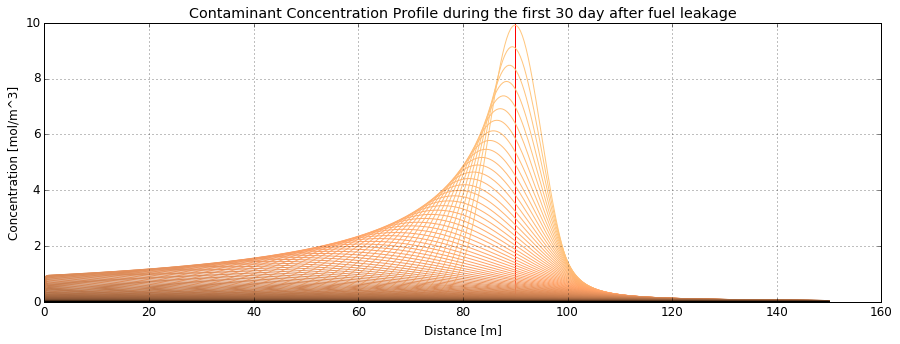

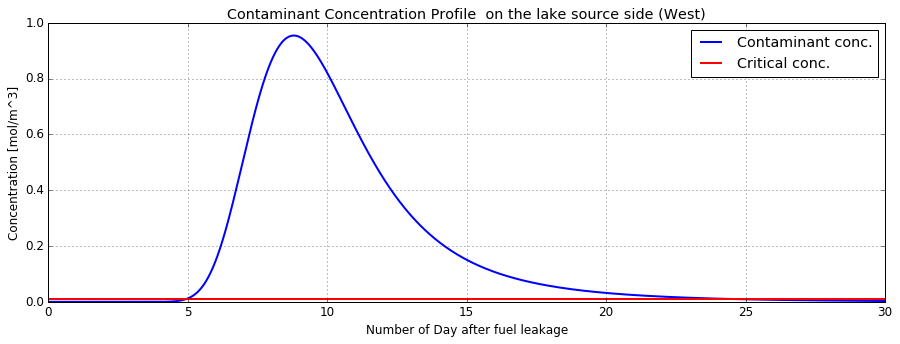

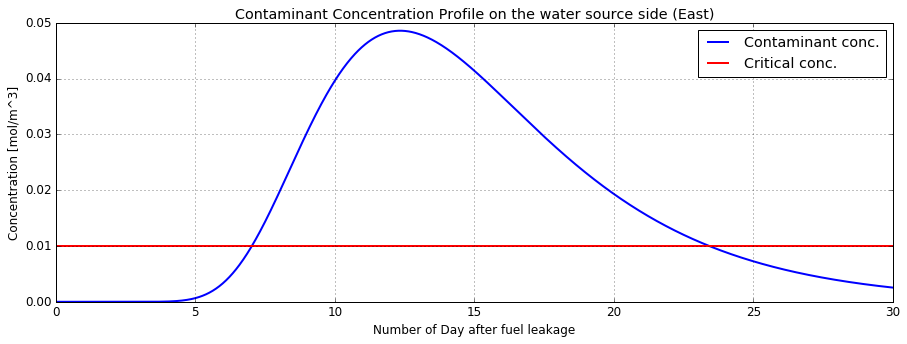

In [13]:
c, lake_side, watersource_side = concentration(kappa,c_init,v,xvals,spill_loc,dx,L,nx,plot=True, info=True)

## Determine breakthrough curves (10 pts)

In our problem description, we were mainly interested in the question if parts of the contaminant plume arrive at the source at the right side of the problem, rather than the distribution in space. 

Let's say that only a certain contaminant density actually leads to a problem, say once a critical value is reached:

$$c(x) > c_{crit}$$

As a critical value, we consider here as an example:

| Property | Variable name | value | unit | 
|----------|-------|------|-------------|
| Critical concentration | c$_{crit}$ | 0.01 | [mol/m$^3$] |

We can determine this criterion on the basis of our simulation. A simple way is to determine if - and when - a contamination plume reaches a point is to plot "breakthrough curves" at a location: the concentration over time at a given position.


**Your task**: extend your code to create a plot of concentration vs. time at a given location. Evaluate the breakthrough curves at both sides of the model domain (x = 1 and x = -1, to limit effect of boundary values):

In [14]:
# Incluced in the previous section

## Analysis of model sensitivity (20 pts + 10 pts bonus)

You obtained a result through your previous analysis and might now be tempted to bring the good (or bad?) news to your customer/ the king. As your motivation to get the results of the study correct is very high, you are interested to evaluate how robust your results are.

The first step is to combine all the previous steps into a single function call to make testing of different parameters easier:

**Your task (10 pts)**: combine all the previous steps into a single function call to enable the quick testing of different settings. The function should have all relevant rock  properties and boundary values as input, and produce plots of solute concentration over time and breakthrough curves at both ends.

As an idea: your function call could look like this:

```contamination_analysis(T=0.01, K=0.001, q_in=2.E-4, 
                          spill_loc=95,
                          t_total=40 * 24 * 3600.,
                          kappa=8E-5, nx=300, por=0.2,
                          bc_0 = 10, bc_1=12.
```


In [15]:
########################################################################
###################### Contamination Analysis ######3###################
########################################################################

def contamination_analysis(T, K, q, spill_loc, t_total,nt, kappa, nx, por, bc_0, bc_1, plot=True, info=True):
    
    ####################################################################
    
    # Get spatial grid settings
    xvals = np.linspace(0,L,nx)
    dx= L/nx
    
    ####################################################################
    
    # Time vector settings
    t = np.linspace(0,t_total,nt)
    dt= t_total/(nt-1)
    nt = 1500   # Chosen number of timesteps
    
    ####################################################################
    
    # Create contaminant vector
    c_init = 10 * np.exp( - (xvals - spill_loc)**2 / (2 * 5**2)) 
    
    ####################################################################
    
    # 1)Solve for hydraulic head
    h = hydraulic_head(bc_0,bc_1,qsource,spill_loc,T,dx,nx,plot=False)
    
    # 2)Solve for velocity field
    v = fluid_velocity(h,nx,dx,K,por,plot=False,info=True)
    
    # 3) Solve for time-dependent contaminant transport and diffusion
    c, lake_side, watersource_side = concentration(kappa,c_init,v,xvals,spill_loc,dx,L,nx, plot,info)
    
    ####################################################################
    
    return lake_side, watersource_side

Now that we have this function, we can test the sensitivity of the model output with respect to the defined rock properties and boundary conditions.

If you consider again the set-up of our problem before: which parameters or boundary condition would you expect to be uncertain? Decide on (at least) one parameter and evaluate how sensitive the result are with respect to this parameter.

Possible parameter changes are:

- dirichlet boundary conditions: what if the head value at the source is lower (11 m) or higher (13 m)?
- recharge/ rain fall: what happens if our estimate is wrong (half/ double the value that we used)?
- how about the exact location of the spill and the estimated initial spread?

**Your task (10 pts + 10 bonus pts)**: Test the influence of parameter uncertainties on the potential contamination at the water source/ pool. You get full points for the analysis and brief discussion of one parameter (examples in the list above).

In addition, I am giving up to 10 bonus points to, for example, (a) a detailed discussion of several parameters, (b) creative ways to perform the analysis, or (c) a very good representation of the results!

So: what are the implications of these results for the specific scenario above that you considered? 

###################################################
######## Investigate Location of Spillage #########
###################################################
Spillage = 90m
The maximum hydraulic head is 12.590 m
Local mininum fluid velocity (approx.): -0.00025 m/s
Local maximum fluid velocity (approx.): 0.00012 m/s
Neumann number: 0.7378
Courant number: 1.1691
Peclet number: 1.5846
dx=0.375 m
dt=1729.15s (0.48032 hours)
-----------------------------------------------
Spillage = 50m
The maximum hydraulic head is 12.590 m
Local mininum fluid velocity (approx.): -0.00025 m/s
Local maximum fluid velocity (approx.): 0.00012 m/s
Neumann number: 0.7378
Courant number: 1.1691
Peclet number: 1.5846
dx=0.375 m
dt=1729.15s (0.48032 hours)
-----------------------------------------------
Spillage = 110m
The maximum hydraulic head is 12.590 m
Local mininum fluid velocity (approx.): -0.00025 m/s
Local maximum fluid velocity (approx.): 0.00012 m/s
Neumann number: 0.7378
Courant number: 1.1691
Peclet num

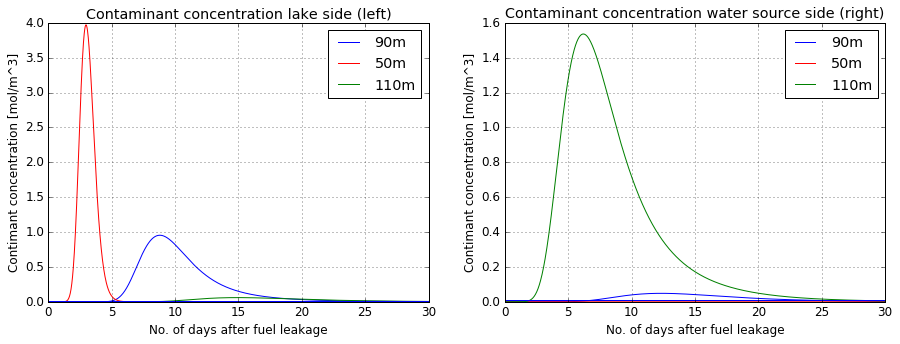

In [16]:
# Influence of location of Spillage

print '###################################################'
print '######## Investigate Location of Spillage #########'
print '###################################################'


print 'Spillage = 90m'
[L1, R1] =  contamination_analysis(T=0.01, K=0.001, q=1.E-5,
                          spill_loc=90,
                          t_total=40 * 24 * 3600., nt = 1500.,
                          kappa=6E-5, nx=400, por=0.2,
                          bc_0 = 10, bc_1=12,  plot=False, info=True)

print "-----------------------------------------------"

print 'Spillage = 50m'
[L2, R2] =  contamination_analysis(T=0.01, K=0.001, q=1.E-5,
                          spill_loc=50,
                          t_total=40 * 24 * 3600., nt = 1500.,
                          kappa=6E-5, nx=400, por=0.2,
                          bc_0 = 10, bc_1=12,  plot=False, info=True)


print "-----------------------------------------------"

print 'Spillage = 110m'
[L3, R3] =  contamination_analysis(T=0.01, K=0.001, q=1.E-5,
                          spill_loc=110,
                          t_total=40 * 24 * 3600., nt = 1500.,
                          kappa=6E-5, nx=400, por=0.2,
                          bc_0 = 10, bc_1=12,  plot=False, info=True)

print "-----------------------------------------------"

fig = plt.figure(figsize=(15,5))

# Lake Side
ax1 = fig.add_subplot(121)
ax1.plot(t_days,L1,'b',t_days,L2,'r',t_days,L3,'g',np.array([0,30]), np.array( [0.01, 0.01]))
plt.title('Contaminant concentration lake side (left)')
plt.xlabel('No. of days after fuel leakage')
plt.ylabel('Contimant concentration [mol/m^3]')
plt.legend(['90m','50m','110m'])
plt.grid()

# Water source side
ax1 = fig.add_subplot(122)
ax1.plot(t_days,R1,'b',t_days,R2,'r',t_days,R3,'g',np.array([0,30]), np.array( [0.01, 0.01]))
plt.title('Contaminant concentration water source side (right)')
plt.xlabel('No. of days after fuel leakage')
plt.ylabel('Contimant concentration [mol/m^3]')
plt.legend(['90m','50m','110m'])
plt.grid()

$Disscussion$: Comparing two case scenarios with our location of spillage (at 90m), one at 50m and one at 110m.

Spillage at $50$ m: The initial solute distribution (the gaussian) is shifted to the left towards the lake. And since the concentration is calculated from this initial distributioni, it makes sense when there is high concentration of contaminanting solutes on the plot of the lake side, comparing to the water source side. As time progress the concentration falls to zeros around the 6th day after the accident. 

Spillage at $110$ m: In this case, the spill is towards the water source (right), so on the right side, towards the water source, the concentration of spillage at 110 m dominates at this boundary, peaking around $1.5 mol/m^3$ on day 6 after the accident. The concentration falls to zeros after 25 days.

All in all, it is suffice to say that the contamination concentration distribution is sensitive to the location of spillage.

$Implication$: If the fuel spillage had happened closer to the either the lake or the water source, the solute would have easily contaminate the lake or the water source.

###################################################
######## Investigate Boundary Conditions ##########
###################################################
bc_0 = 10, bc_1=12
The maximum hydraulic head is 12.590 m
Local mininum fluid velocity (approx.): -0.00025 m/s
Local maximum fluid velocity (approx.): 0.00012 m/s
Neumann number: 0.7378
Courant number: 1.1691
Peclet number: 1.5846
dx=0.375 m
dt=1729.15s (0.48032 hours)
-----------------------------------------------
bc_0 = 5, bc_1=12
The maximum hydraulic head is 11.997 m
Local mininum fluid velocity (approx.): -0.00042 m/s
Local maximum fluid velocity (approx.): -0.00005 m/s
Neumann number: 0.7378
Courant number: 1.1691
Peclet number: 1.5846
dx=0.375 m
dt=1729.15s (0.48032 hours)
-----------------------------------------------
bc_0 = 16, bc_1=12
The maximum hydraulic head is 16.121 m
Local mininum fluid velocity (approx.): -0.00005 m/s
Local maximum fluid velocity (approx.): 0.00032 m/s
Neumann number: 0.7378
Courant number: 1.1691

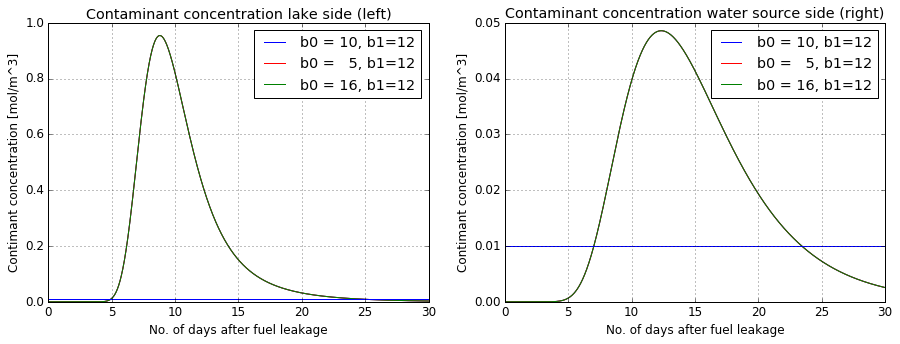

In [17]:
# Influence of changing boundary conditions

print '###################################################'
print '######## Investigate Boundary Conditions ##########'
print '###################################################'


print 'bc_0 = 10, bc_1=12'
[L1, R1] =  contamination_analysis(T=0.01, K=0.001, q=1.E-5,
                          spill_loc=90,
                          t_total=40 * 24 * 3600., nt = 1500.,
                          kappa=6E-5, nx=400, por=0.2,
                          bc_0 = 10, bc_1=12,  plot=False, info=True)

print "-----------------------------------------------"

print 'bc_0 = 5, bc_1=12'
[L2, R2] =  contamination_analysis(T=0.01, K=0.001, q=1.E-5,
                          spill_loc=90,
                          t_total=40 * 24 * 3600., nt = 1500.,
                          kappa=6E-5, nx=400, por=0.2,
                          bc_0 = 5, bc_1=12,  plot=False, info=True)


print "-----------------------------------------------"

print 'bc_0 = 16, bc_1=12'
[L3, R3] =  contamination_analysis(T=0.01, K=0.001, q=1.E-5,
                          spill_loc=90,
                          t_total=40 * 24 * 3600., nt = 1500.,
                          kappa=6E-5, nx=400, por=0.2,
                          bc_0 = 16, bc_1=12,  plot=False, info=True)

print "-----------------------------------------------"

fig = plt.figure(figsize=(15,5))

# Lake Side
ax1 = fig.add_subplot(121)
ax1.plot(t_days,L1,'b',t_days,L2,'r',t_days,L3,'g',np.array([0,30]), np.array( [0.01, 0.01]))
plt.title('Contaminant concentration lake side (left)')
plt.xlabel('No. of days after fuel leakage')
plt.ylabel('Contimant concentration [mol/m^3]')
plt.legend(['b0 = 10, b1=12','b0 =   5, b1=12','b0 = 16, b1=12'])
plt.grid()

# Water source side
ax1 = fig.add_subplot(122)
ax1.plot(t_days,R1,'b',t_days,R2,'r',t_days,R3,'g',np.array([0,30]), np.array( [0.01, 0.01]))
plt.title('Contaminant concentration water source side (right)')
plt.xlabel('No. of days after fuel leakage')
plt.ylabel('Contimant concentration [mol/m^3]')
plt.legend(['b0 = 10, b1=12','b0 =   5, b1=12','b0 = 16, b1=12'])
plt.grid()

$Discussion$: The contaminant concentrations appear to be $insensitive$ to the boundary conditions on the two sides of the model domain. However, the hydraulic head and the velocity range are affected by any changeds in the boundary conditions. 

$Implication$: The contaminant concentration/ solute distribution remains unaffected, regardless of the difference in elevation between the water source and the lake.